In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from __future__ import division

# SAAF VALIDATION

Hand Calculation of SAAF on two-element grid

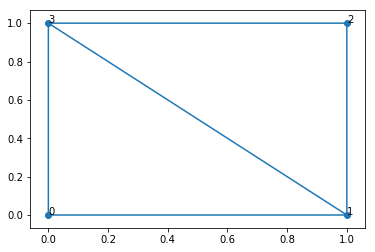

In [2]:
x = np.array([0, 1, 1, 0])
y = np.array([0, 0, 1, 1])
triangles = np.array([[3, 0, 1], [1, 2, 3]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(4):
    plt.annotate(i, (x[i], y[i]))
plt.show()

$\Omega = [.5773503, .5773503], \sigma_t = 1, \frac{1}{\sigma_t} = 1$

In [3]:
omega = np.array([.5773503,.5773503])
sigt = 1
inv_sigt = 1

Instantiate A matrix (four nodes $\rightarrow$ 4x4)

In [4]:
A = np.zeros((4, 4))

### Loop over the elements:
    for element 0, calculate the basis functions

In [5]:
V = np.array([[1, 0, 1], [1, 0, 0], [1, 1, 0]])
C = np.linalg.inv(V)
C

array([[ 0.,  1.,  0.],
       [ 0., -1.,  1.],
       [ 1., -1.,  0.]])

Basis functions (using global node numbers as indicies)
$\varphi_3 = 0 + 0x + 1y  = y\\
\varphi_0 = 1 + -1x -1y = 1 - (x+y) \\
\varphi_1 = 0 + x +0y = x$

    Loop through basis function pairs:
        All are on the boundary, now figure out which boundary.
$<\varphi_3, \varphi_3>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_3, \varphi_0>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore.

$<\varphi_0, \varphi_3>$ is on the x-min boundary.  $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_0, \varphi_0>$ is on the x-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_0, \varphi_1>$ is on the y-min boundary. $\hat{n} = [0, -1]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.


$<\varphi_1, \varphi_3>$ is not on the boundary, so we ignore.

$<\varphi_1, \varphi_0>$ is on the y-min boundary. $\hat{n} = [0, -1]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

$<\varphi_1, \varphi_1>$ is on the y-min boundary. $\hat{n} = [-1, 0]$ $\hat{n} \cdot \Omega =  -.5773503$ which is less than 0, so we ignore.

Those are all of the basis combinations for the first element, and A remains unchanged.

    for element 1 calculate basis functions:

In [6]:
V = np.array([[1, 1, 0], [1, 1, 1], [1, 0, 1]])
C = np.linalg.inv(V)
C

array([[ 1., -1.,  1.],
       [ 0.,  1., -1.],
       [-1.,  1.,  0.]])

Basis functions (using global node numbers as indicies)
$\varphi_1 = 1 + 0x - 1y  = 1 - y\\
\varphi_2 = -1 + 1x + 1y = x + y - 1 \\
\varphi_3 = 1 - x +0y = 1 - x$

    Loop through basis function pairs:
        All are on the boundary, now figure out which boundary.
$<\varphi_1, \varphi_1>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[1, 1] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_1 = \hat{n} \cdot \Omega \int_0^1 (1-y)^2 = \int_0^1 1 -2y +y^2 = \hat{n} \cdot \Omega [y - y^2 + \frac{1}{3}y^3]_0^1 = .5773503*\frac{1}{3}$



In [7]:
A[1, 1] += omega[0]*(1/3)

$<\varphi_1, \varphi_2>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[1, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n} \cdot \Omega \int_0^1 (1-y)(x + y -1) = .5773503(-\frac{1}{3} + \frac{1}{2})$

In [8]:
A[1, 2] += omega[0]*(1/2 - 1/3)

$<\varphi_1, \varphi_3>$ is not on the boundary, so we ignore

$<\varphi_2, \varphi_1>$ is on the x-max boundary. $\hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[2, 1] += \int_0^1 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n} \cdot \Omega \int_0^1 (1-y)(x + y -1) = .5773503(-\frac{1}{3} + \frac{1}{2})$

In [9]:
A[2, 1] += omega[0]*(1/2 - 1/3)

$<\varphi_2, \varphi_2>$ is on both boundaries we do each one at a time.
For the ymax boundary, $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$ so $A[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(x+y-1) = \hat{n} \cdot \Omega \int_0^1(x+1-1)(x+1-1) = \hat{n} \cdot \Omega \int_0^1x^2 = \hat{n} \cdot \Omega [\frac{1}{3}x^3]_0^1 = .5773503(\frac{1}{3})  $


In [10]:
A[2, 2] += omega[1]*(1/3)

For the xmax boundary,$ \hat{n} = [1, 0]$ $\hat{n} \cdot \Omega = .5773503$ which is $>0$, so $A[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = .5773503(\frac{1}{3})$

In [11]:
A[2, 2] += omega[0]*(1/3)

$<\varphi_2, \varphi_3>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[2, 3] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(1-x) = \hat{n} \cdot \Omega [\frac{1}{2} - \frac{1}{3}] $

In [12]:
A[2, 3] += omega[1]*(1/2 - 1/3)

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore

$<\varphi_3, \varphi_2>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[3, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(x+y-1)(1-x) = \hat{n} \cdot \Omega [\frac{1}{2} - \frac{1}{3}] $

In [13]:
A[3, 2] += omega[1]*(1/2 - 1/3)

$<\varphi_3, \varphi_3>$ is on the y-max boundary. $\hat{n} = [0, 1]$ $\hat{n} \cdot \Omega = .5773503 > 0$, so $A[3, 3] += \int_0^1 \hat{n}\cdot \Omega \varphi_3 \varphi_3 = \hat{n} \cdot \Omega \int_0^1(1-x)(1-x) =\hat{n} \cdot \Omega \int_0^1 1 - 2x + x^2 = \hat{n} \cdot \Omega [x - x^2 + \frac{1}{3}x^3]_0^1 = .5773503(\frac{1}{3}) $

In [14]:
A[3, 3] += omega[0]*(1/3)

Those are all the elements, so the final A is

In [15]:
print(A)

[[ 0.          0.          0.          0.        ]
 [ 0.          0.1924501   0.09622505  0.        ]
 [ 0.          0.09622505  0.3849002   0.09622505]
 [ 0.          0.          0.09622505  0.1924501 ]]


Which checks out with the code's LHS matrix for this problem (input name std.1)

## Non-Standard Grid

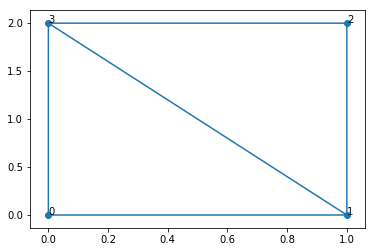

In [16]:
x = np.array([0, 1, 1, 0])
y = np.array([0, 0, 2, 2])
triangles = np.array([[3, 0, 1], [1, 2, 3]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(4):
    plt.annotate(i, (x[i], y[i]))
plt.show()

Same problem as before, new geometry. 
$\Omega = [.5773503, .5773503], \sigma_t = 1, \frac{1}{\sigma_t} = 1$

Instantiate A matrix (four nodes $\rightarrow$ 4x4)

In [17]:
B = np.zeros((4, 4))

### Loop over the elements:

For all of element 0 $\hat{n}\cdot \Omega < 0$, (see above) so move on to element 1.

Calculate Basis Functions.

In [18]:
V = np.array([[1, 1, 0], [1, 1, 2], [1, 0, 2]])
C = np.linalg.inv(V)
C

array([[ 1. , -1. ,  1. ],
       [ 0. ,  1. , -1. ],
       [-0.5,  0.5,  0. ]])

Basis functions (using global node numbers as indicies)
$\varphi_1 = 1 + 0x - .5y  = 1 - .5y\\
\varphi_2 = -1 + 1x + .5y = x + .5y - 1 \\
\varphi_3 = 1 - x +0y = 1 - x$

$B[1, 1] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_1 = \hat{n} \cdot \Omega \int_0^2 (1-\frac{1}{2}y)^2 = \int_0^2 1 -y +\frac{1}{4}y^2 = \hat{n} \cdot \Omega [y - \frac{1}{2}y^2 + \frac{1}{12}y^3]_0^2 = .5773503*[2 - \frac{4}{2} + \frac{8}{12}] = .5773503*[2 - 2 + \frac{2}{3}]$

In [32]:
B[1, 1] = omega[0]*(2/3)
print(B[1, 1])

0.3849002


$B[1, 2] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(x + \frac{1}{2}y - 1) $ On the xmax boundary $x=1,  \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(\frac{1}{2}y) = \hat{n}\cdot \Omega \int_0^2 \frac{1}{2}y - \frac{1}{4}y^2 =\hat{n}\cdot \Omega [\frac{1}{4}y^2 - \frac{1}{12}y^3]0^2 = \hat{n}\cdot \Omega[ \frac{4}{4} - \frac{8}{12}] = .5773503∗[1 - \frac{2}{3}]$

In [30]:
B[1, 2] += omega[0]*(1 - (2/3))

$<\varphi_1, \varphi_3>$ is not on the boundary.

$<\varphi_2, \varphi_1>$ is on the xmax boundary and $x=1$
$B[2, 1] += \int_0^2 \hat{n}\cdot \Omega \varphi_1 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(x + \frac{1}{2}y - 1) $ On the xmax boundary $x=1,  \hat{n}\cdot \Omega \int_0^2 (1 -\frac{1}{2}y)(\frac{1}{2}y) = \hat{n}\cdot \Omega \int_0^2 \frac{1}{2}y - \frac{1}{4}y^2 =\hat{n}\cdot \Omega [\frac{1}{4}y^2 - \frac{1}{12}y^3]0^2 = \hat{n}\cdot \Omega[ \frac{4}{4} - \frac{8}{12}] = .5773503∗[1 - \frac{2}{3}]$

In [21]:
B[2, 1] += omega[0]*(1 - (2/3))

$<\varphi_2, \varphi_2>$ is along both max boundaries so we split up into two calculations. First the xmax boundary where $x=1$:  

$B[2, 2] += \int_0^2 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n}\cdot \Omega \int_0^2 (x + \frac{1}{2}y - 1)^2 = \hat{n}\cdot \Omega \int_0^2 (\frac{1}{2}y)^2 = \hat{n}\cdot \Omega \int_0^2 \frac{1}{4}y^2 = \hat{n}\cdot \Omega [\frac{1}{12}y^3]_0^2 = .5773503*\frac{2}{3}$

In [22]:
B[2, 2] += omega[0]*(2/3)

Now incorporate the integral along the ymax boundary where $y=2$

$B[2, 2] += \int_0^1 \hat{n}\cdot \Omega \varphi_2 \varphi_2 = \hat{n}\cdot \Omega \int_0^1 (x + \frac{1}{2}y - 1)^2 = \hat{n}\cdot \Omega \int_0^1 (x )^2 = \hat{n}\cdot \Omega \frac{1}{3}x^3 =.5773503*\frac{1}{3}$ 

In [23]:
B[2, 2] += omega[0]*(1/3)

$<\varphi_2, \varphi_3>$ is on the ymax boundary where $y=2$

$B[2, 3] += \hat{n}\cdot \Omega \int_0^1(x + \frac{1}{2}y - 1)(1 - x) dx =\hat{n}\cdot \Omega \int_0^1(x)(1-x) dx =  \hat{n}\cdot \Omega \int_0^1 x - x^2 = \hat{n}\cdot \Omega [\frac{1}{2}x^2 - \frac{1}{3}x^3]_0^1 = .5773503∗[\frac{1}{2} - \frac{1}{3}]$

In [24]:
B[2, 3] += .5773503*((1/2) - (1/3))

$<\varphi_3, \varphi_1>$ is not on the boundary, so we ignore.

$B[3, 2] += B[2, 3] = .5773503∗[\frac{1}{2}−\frac{1}{3}]$

In [25]:
B[3, 2] += .5773503*((1/2) - (1/3))

$<\varphi_3, \varphi_3>$ is on the ymax boundary where $y=2$
$B[3, 3] += \hat{n}\cdot \Omega \int_0^1 (1-x)^2 = \hat{n}\cdot \Omega \int_0^1 1 -2x +x^2 = \hat{n}\cdot \Omega [x - x^2 + \frac{1}{3}x^3]_0^1 =   .5773503* \frac{1}{3}$

In [26]:
B[3, 3] += omega[0]*(1/3)

In [33]:
B

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.3849002 ,  0.5773503 ,  0.        ],
       [ 0.        ,  0.1924501 ,  0.5773503 ,  0.09622505],
       [ 0.        ,  0.        ,  0.09622505,  0.1924501 ]])